## Qiskit Statevector and Qulacs provider statevector

In [1]:
wires = range(4,21)
num_runs = 10

In [2]:
import numpy as np
from qiskit_qulacs import QulacsProvider
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import TwoLocal
from timeit import default_timer as timer
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

data = {
    'wires': [],
    'qulacs_sim': [],
    'qiskit_sim': []
}

# observation
# during execution all cpus present in the system are utilized 

provider = QulacsProvider()
qulacs_sv = provider.get_backend("statevector_simulator")

for wire in wires:
    print('wire:', wire)
    
    n = wire
    params = np.random.rand(2*3*n)
    ansatz = TwoLocal(n, ['rx', 'ry', 'rz'], ['cx'], 'linear', 1, skip_final_rotation_layer=False).decompose()
    ansatz = ansatz.bind_parameters(params)
    
    timing_qulacs_sim = []
    timing_qiskit_sim = []
    
    for t in range(num_runs):
        start = timer()
        qulacs_sim = qulacs_sv.run(ansatz)
        end = timer()
        timing_qulacs_sim.append(end - start)
        
        start = timer()
        qiskit_sim = Statevector(ansatz)
        end = timer()
        timing_qiskit_sim.append(end - start)
        
        assert np.allclose(qulacs_sim.result().get_statevector(), qiskit_sim.data) == True
    
    data['wires'] += [n]
    data['qulacs_sim'] += [np.mean(timing_qulacs_sim)]
    data['qiskit_sim'] += [np.mean(timing_qiskit_sim)]
    
    pd.DataFrame(data).to_csv('benchmark_qulacs_qiskit_sv_simulation.csv', index=False)

wire: 4
wire: 5
wire: 6
wire: 7
wire: 8
wire: 9
wire: 10
wire: 11
wire: 12
wire: 13
wire: 14
wire: 15
wire: 16
wire: 17
wire: 18
wire: 19
wire: 20


In [3]:
df = pd.read_csv('benchmark_qulacs_qiskit_sv_simulation.csv')
df

,wires,qulacs_sim,qiskit_sim
0,4,0.000175,0.001187
1,5,0.000237,0.001493
2,6,0.000294,0.001982
3,7,0.000297,0.002094
4,8,0.000313,0.002402
5,9,0.000370,0.002797
6,10,0.000399,0.003191
7,11,0.000446,0.003760
8,12,0.000688,0.005886
9,13,0.000746,0.007649


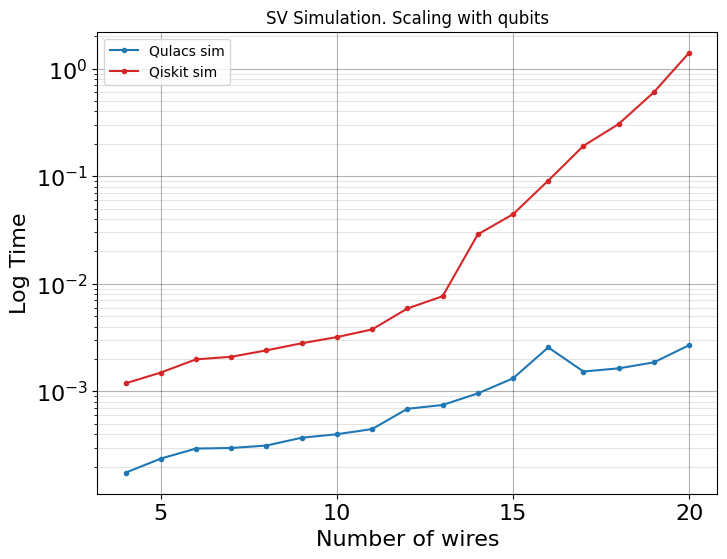

In [4]:
wires = df['wires'].tolist()
qulacs_sim = df['qulacs_sim'].tolist()
qiskit_sim = df['qiskit_sim'].tolist()
    
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.plot(wires, qulacs_sim, '.-', label="Qulacs sim")
ax.plot(wires, qiskit_sim, '.-', label="Qiskit sim", color="C3")

ax.legend()

ax.set_xlabel("Number of wires", fontsize=16)
ax.set_xticks([5,10,15,20])
ax.set_ylabel("Log Time", fontsize=16)
ax.set_yscale("log")
ax.set_title("SV Simulation. Scaling with qubits")
ax.grid(which='major', color='black', linestyle='-', alpha=0.3)
ax.grid(which='minor', color='black', linestyle='-', alpha=0.1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

## Qiskit Estimator and Qulacs Estimator

In [5]:
import numpy as np
from qiskit_qulacs.qulacs_estimator import QulacsEstimator
from qiskit.circuit.library import TwoLocal
from timeit import default_timer as timer
from qiskit.primitives import Estimator
import pandas as pd
import matplotlib.pyplot as plt
from qiskit.quantum_info import SparsePauliOp

np.random.seed(0)

data = {
    'wires': [],
    'qulacs_est': [],
    'qiskit_est': []
}

# observation
# during execution all cpus present in the system are utilized 

qiskit_estimator = Estimator()
qulacs_estimator = QulacsEstimator()


for wire in wires:
    print('wire:', wire)
    
    n = wire
    params = np.random.rand(2*3*n)
    ansatz = TwoLocal(n, ['rx', 'ry', 'rz'], ['cx'], 'linear', 1, skip_final_rotation_layer=False).decompose()
    obs = SparsePauliOp.from_list([("Z"*n, 1)])
    
    timing_qulacs_est = []
    timing_qiskit_est = []
    
    for t in range(num_runs):
        start = timer()
        qulacs_est = qulacs_estimator.run([ansatz], [obs], [params]).result().values[0]
        end = timer()
        timing_qulacs_est.append(end - start)
        
        start = timer()
        qiskit_est = qiskit_estimator.run([ansatz], [obs], [params]).result().values[0]
        end = timer()
        timing_qiskit_est.append(end - start)
        
        assert np.allclose(qulacs_est, qiskit_est) == True
    
    data['wires'] += [n]
    data['qulacs_est'] += [np.mean(timing_qulacs_est)]
    data['qiskit_est'] += [np.mean(timing_qiskit_est)]
    
    pd.DataFrame(data).to_csv('benchmark_qulacs_qiskit_estimator.csv', index=False)

wire: 4
wire: 5
wire: 6
wire: 7
wire: 8
wire: 9
wire: 10
wire: 11
wire: 12
wire: 13
wire: 14
wire: 15
wire: 16
wire: 17
wire: 18
wire: 19
wire: 20


In [6]:
df = pd.read_csv('benchmark_qulacs_qiskit_estimator.csv')
df

,wires,qulacs_est,qiskit_est
0,4,0.000747,0.002124
1,5,0.000855,0.002621
2,6,0.000812,0.002908
3,7,0.000872,0.003504
4,8,0.001074,0.003960
5,9,0.001124,0.004241
6,10,0.001221,0.004732
7,11,0.002223,0.008424
8,12,0.002067,0.006348
9,13,0.002056,0.008091


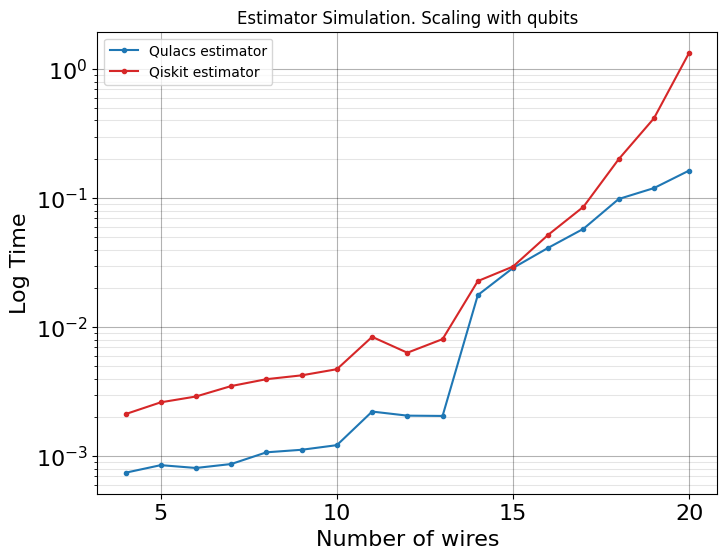

In [7]:
wires = df['wires'].tolist()
qulacs_est = df['qulacs_est'].tolist()
qiskit_est = df['qiskit_est'].tolist()
    
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.plot(wires, qulacs_est, '.-', label="Qulacs estimator")
ax.plot(wires, qiskit_est, '.-', label="Qiskit estimator", color="C3")

ax.legend()

ax.set_xlabel("Number of wires", fontsize=16)
ax.set_xticks([5,10,15,20])
ax.set_ylabel("Log Time", fontsize=16)
ax.set_yscale("log")
ax.set_title("Estimator Simulation. Scaling with qubits")
ax.grid(which='major', color='black', linestyle='-', alpha=0.3)
ax.grid(which='minor', color='black', linestyle='-', alpha=0.1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

## Qiskit ReverseEstimatorGradient and Qulacs Estimator Gradient

In [8]:
import numpy as np
from qiskit.algorithms.gradients import ReverseEstimatorGradient
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import Estimator
from qiskit_qulacs.qulacs_estimator_gradient import QulacsEstimatorGradient
from qiskit.circuit.library import TwoLocal
from timeit import default_timer as timer
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

data = {
    'wires': [],
    'qulacs_grad': [],
    'qiskit_grad': []
}

qiskit_estimator_grad = ReverseEstimatorGradient()
qulacs_estimator_grad = QulacsEstimatorGradient(Estimator())

for wire in wires:
    print('wire:', wire)
    
    n = wire
    params = np.random.rand(2*3*n)
    ansatz = TwoLocal(n, ['rx', 'ry', 'rz'], ['cx'], 'linear', 1, skip_final_rotation_layer=False).decompose()
    obs = SparsePauliOp.from_list([("Z"*n, 1)])
    
    # Run, calculate the quantum circuit Jacobian and average the timing results
    timing_qulacs_grad = []
    timing_qiskit_grad = []
    
    for t in range(num_runs):
        start = timer()
        qulacs_grad = qulacs_estimator_grad.run([ansatz], [obs], [params]).result().gradients[0]
        end = timer()
        timing_qulacs_grad.append(end - start)
        
        start = timer()
        qiskit_grad = qiskit_estimator_grad.run([ansatz], [obs], [params]).result().gradients[0]
        end = timer()
        timing_qiskit_grad.append(end - start)
    
        assert np.allclose(qulacs_grad, qiskit_grad) == True
    
    data['wires'] += [n]
    data['qulacs_grad'] += [np.mean(timing_qulacs_grad)]
    data['qiskit_grad'] += [np.mean(timing_qiskit_grad)]
    
    pd.DataFrame(data).to_csv('benchmark_qulacs_qiskit_grad.csv', index=False)

wire: 4
wire: 5
wire: 6
wire: 7
wire: 8
wire: 9
wire: 10
wire: 11
wire: 12
wire: 13
wire: 14
wire: 15
wire: 16
wire: 17
wire: 18
wire: 19
wire: 20


In [9]:
df = pd.read_csv('benchmark_qulacs_qiskit_grad.csv')
df

,wires,qulacs_grad,qiskit_grad
0,4,0.000889,0.045010
1,5,0.001033,0.049532
2,6,0.001094,0.059319
3,7,0.001271,0.077053
4,8,0.001496,0.087251
5,9,0.001788,0.098481
6,10,0.002374,0.116706
7,11,0.003178,0.125736
8,12,0.006763,0.143887
9,13,0.007699,0.174498


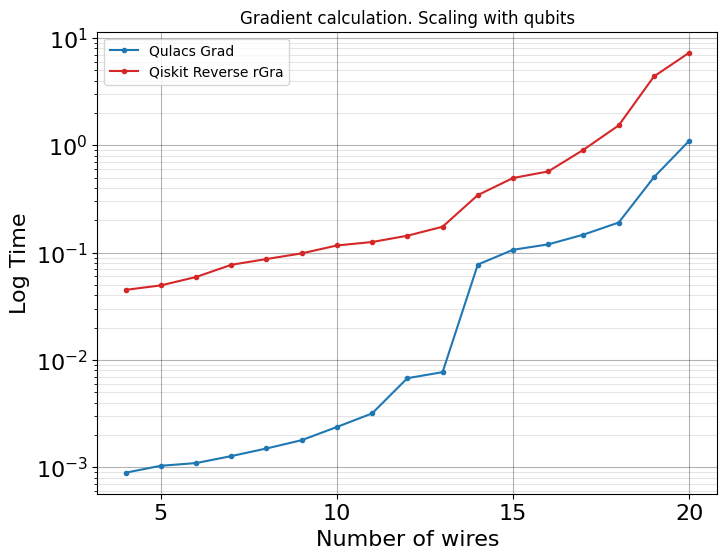

In [10]:
wires = df['wires'].tolist()
qulacs_grad = df['qulacs_grad'].tolist()
qiskit_grad = df['qiskit_grad'].tolist()
    
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.plot(wires, qulacs_grad, '.-', label="Qulacs Grad")
ax.plot(wires, qiskit_grad, '.-', label="Qiskit Reverse rGra", color="C3")

ax.legend()

ax.set_xlabel("Number of wires", fontsize=16)
ax.set_xticks([5,10,15,20])
ax.set_ylabel("Log Time", fontsize=16)
ax.set_yscale("log")
ax.set_title("Gradient calculation. Scaling with qubits")
ax.grid(which='major', color='black', linestyle='-', alpha=0.3)
ax.grid(which='minor', color='black', linestyle='-', alpha=0.1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()